In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [30]:
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

cmap = 'PRGn'

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


## Time and Date of the experiment

In [4]:
print(ib.date)

2021-04-13 06:44:30.459868


## In order to simulate human behavioral experiment in the ML setting, the models were trained 126 times on 126 different simulation datasets with the same parameter. Then, 100 random points from the posterior probability on grid were sampled 126 times. The same happened for hellinger distance computation

In [25]:
reps = 126
saved_clf = ib.clf
uX = ib.mask
uX0, uX1 = uX[:,0], uX[:,1]

N_sample = round(100/3600 * ib.estpst[1][0][3].shape[0]) #sample the same proportion

label = ib.mtype[:3] + ['Human'] #excluding QDA
fsize= 18

## Get trained model profile

In [6]:
# ib.get_sampledData(saved_clf=saved_clf, reps=reps, N_sample=N_sample)


saving current attributes..
completed after 3 seconds
saved as [ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SampledData.pickle ]


In [6]:
ib.load_sampledData()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SampledData.pickle ] loaded


## Roughly 4 times the original grid points were collected from sampling (100 points, 126 reps, 4.3 range)

In [9]:
ib.mask.shape, ib.estpst_sample[0][0].shape

((739600, 2), (2588544, 3))

## Sampled ML models on different simulation datasets

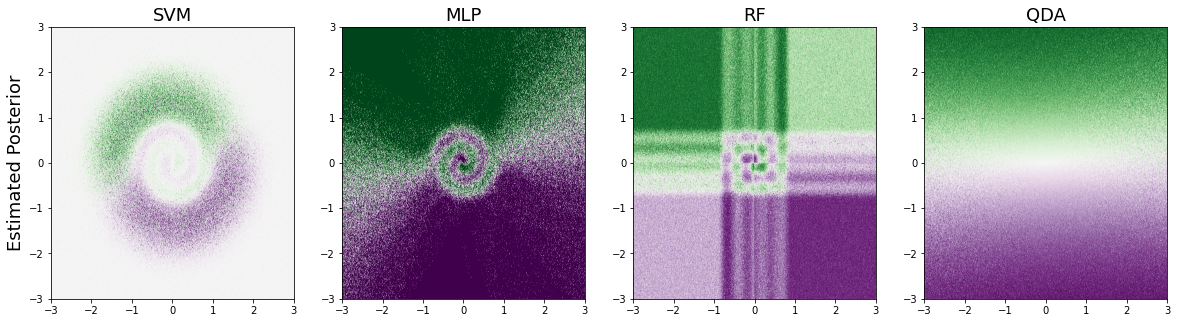

In [10]:
fig, axs = plt.subplots(1,4, figsize=(5*4,5))

for i, mod in enumerate(ib.mtype):
    tempxy3 = ib.pointwise_gridAverage(ib.estpst_sample[0][i][::1])
    axs[i].scatter(x=tempxy3['x'],y=tempxy3['y'],c=tempxy3['c'],s=0.1,cmap='PRGn')
    axs[i].set_title(mod,fontsize=fsize)
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    axs[0].set_ylabel('Estimated Posterior',fontsize=fsize)
    plt.savefig(f'figs/[20210408_trainML_like_human]_averaged_126models_posterior_spiral_{str(ib.date.date())}.png', bbox_inches='tight')

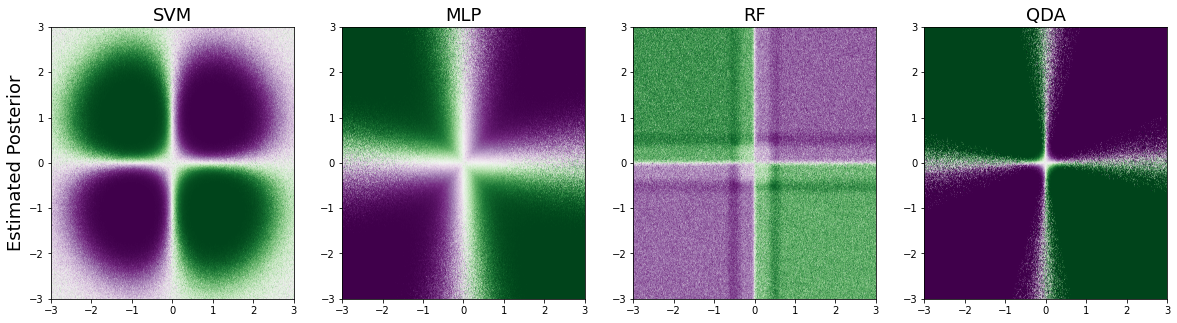

In [157]:
fig, axs = plt.subplots(1,4, figsize=(5*4,5))

for i, mod in enumerate(ib.mtype):
    tempxy3 = ib.pointwise_gridAverage(ib.estpst_sample[1][i][::1])
    axs[i].scatter(x=tempxy3['x'],y=tempxy3['y'],c=tempxy3['c'],s=0.1,cmap='PRGn')
    axs[i].set_title(mod,fontsize=fsize)
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    axs[0].set_ylabel('Estimated Posterior',fontsize=fsize)
    plt.savefig(f'figs/[20210408_trainML_like_human]_averaged_126models_posterior_sxor_{str(ib.date.date())}.png', bbox_inches='tight')

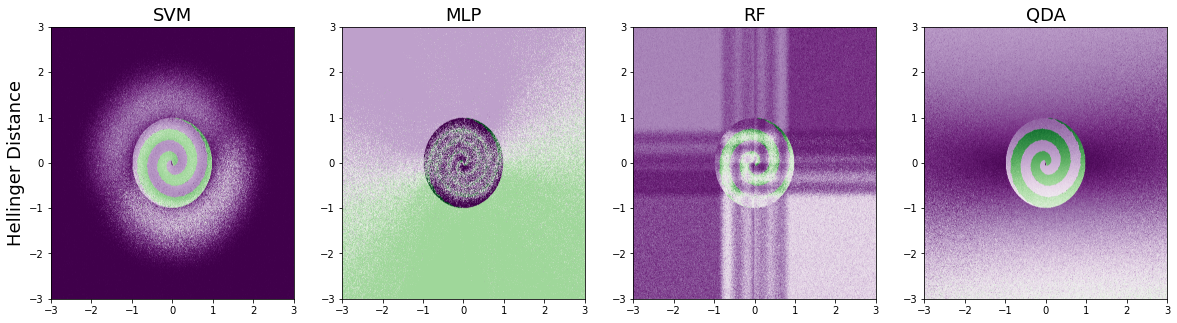

In [158]:
fig, axs = plt.subplots(1,4, figsize=(5*4,5))

for i, mod in enumerate(ib.mtype):
    tempxy3 = ib.pointwise_gridAverage(ib.hdist_sample[0][i][::1])
    axs[i].scatter(x=tempxy3['x'],y=tempxy3['y'],c=tempxy3['c'],s=0.1,cmap='PRGn')
    axs[i].set_title(mod,fontsize=fsize)
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    axs[0].set_ylabel('Hellinger Distance',fontsize=fsize)
    plt.savefig(f'figs/[20210408_trainML_like_human]_averaged_126models_hellinger_spiral_{str(ib.date.date())}.png', bbox_inches='tight')

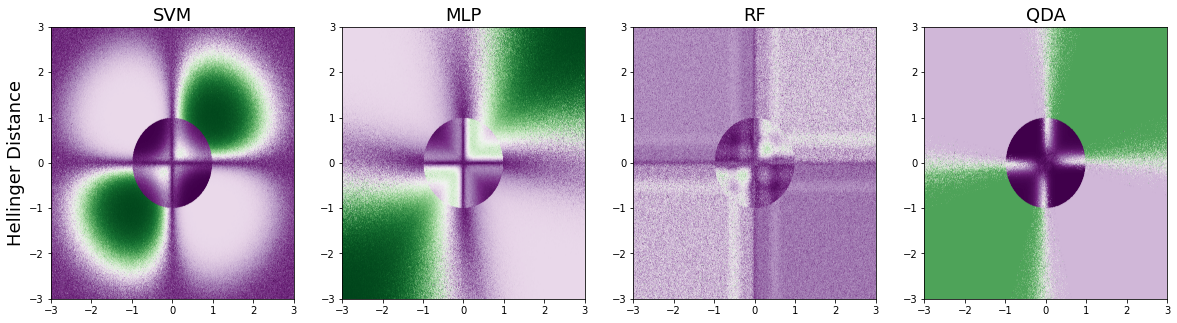

In [159]:
fig, axs = plt.subplots(1,4, figsize=(5*4,5))

for i, mod in enumerate(ib.mtype):
    tempxy3 = ib.pointwise_gridAverage(ib.hdist_sample[1][i][::1])
    axs[i].scatter(x=tempxy3['x'],y=tempxy3['y'],c=tempxy3['c'],s=0.1,cmap='PRGn')
    axs[i].set_title(mod,fontsize=fsize)
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    axs[0].set_ylabel('Hellinger Distance',fontsize=fsize)
    plt.savefig(f'figs/[20210408_trainML_like_human]_averaged_126models_hellinger_sxor_{str(ib.date.date())}.png', bbox_inches='tight')

## Generate compiled figure using sampled data
`ib.estpst_sample` and `ib.hdist_sample` are multi-dimensional lists where i is a dataset type and j is a ML model type.

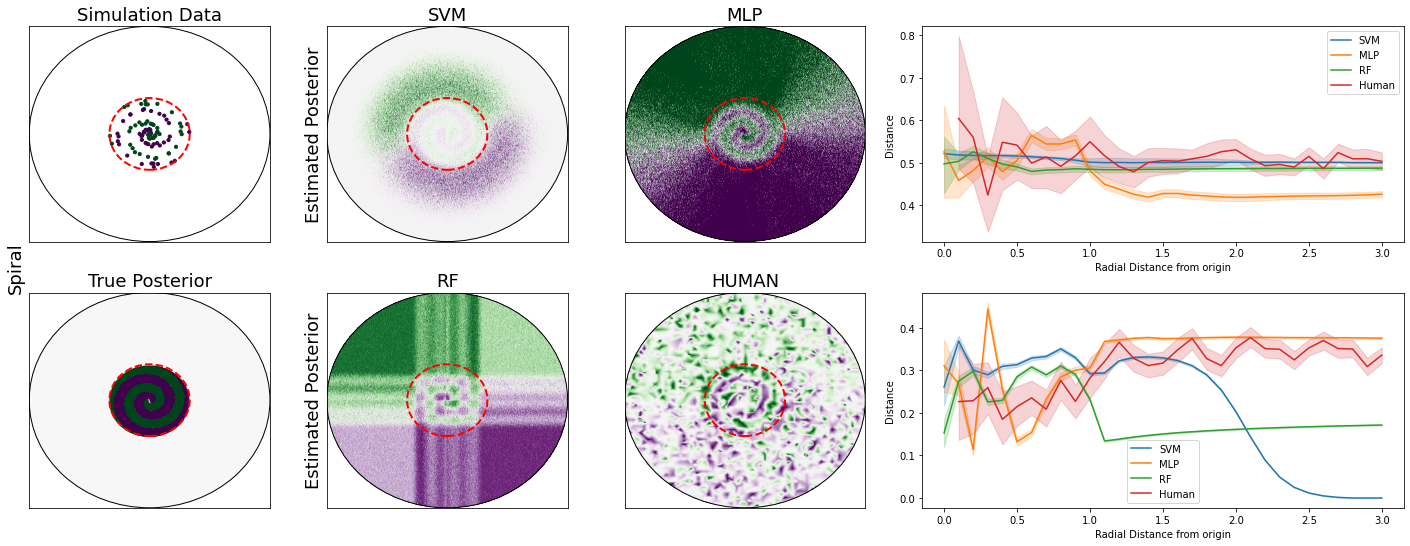

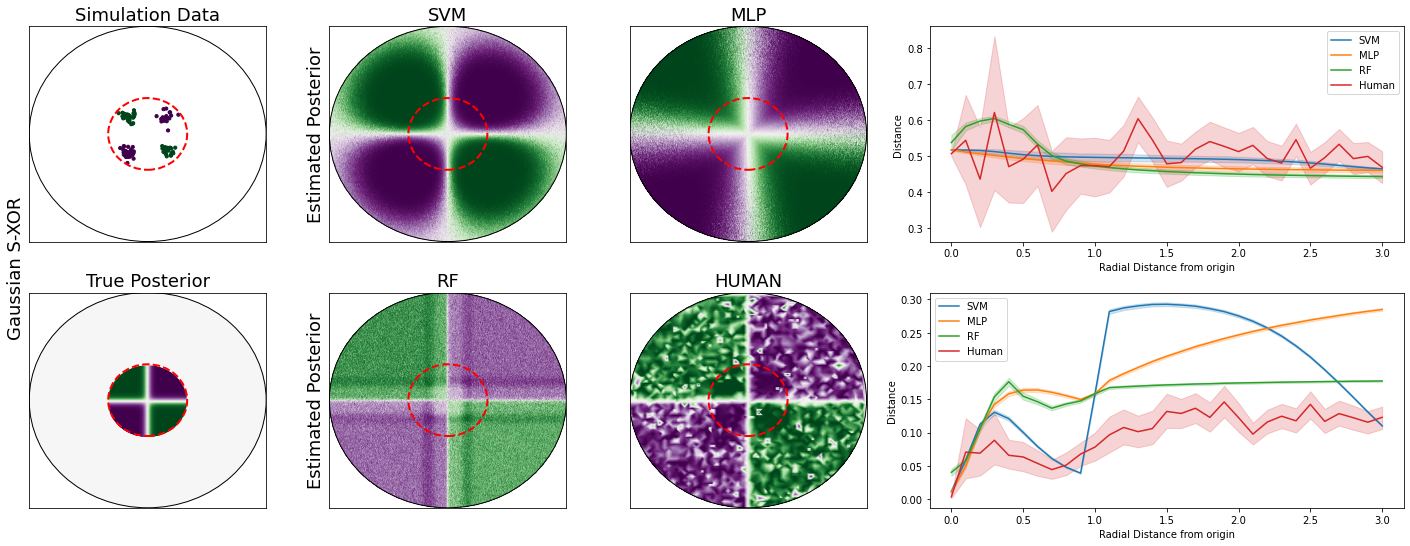

In [41]:
'''
This figure contains simulation data at idx[0,0], true posterior at idx[1,0], 
estimated posterior at idx[i=1,2|j=1,2], class 1 posterior at idx[0,3], and hellinger distance at idx[1,3]
'''
row = 2
col = 4
interp_method = 'linear'  # interpolation methods
fname = ['spiral', 'sxor']

for ii, j in enumerate([2, 4]):

    cnt = 0

    widths = [4, 4, 4, 8]
    fig = plt.figure(figsize=(4*(col+1), 4*row))
    spec = fig.add_gridspec(ncols=col, nrows=row, width_ratios=widths)

    ax = fig.add_subplot(111)
    ax.set_xticks([])
    ax.set_yticks([])

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

    ax.set_ylabel(ib.dtype[j], fontsize=18)

    for k in range(row):
        for i in range(col):
            cnt += 1

            axs = fig.add_subplot(spec[k, i])

            # simulation dataset
            if cnt == 1:
                pcm = axs.scatter(ib.train_X[j][:,0], ib.train_X[j][:,1], c=ib.train_y[j], cmap=cmap, s=10)

            # true posterior
            elif cnt == 5:
                xx = ib.truepst[1][j][0]
                yy = ib.truepst[1][j][1]
                cc = ib.truepst[1][j][2]
                pcm = axs.scatter(xx, yy, c=cc, cmap=cmap, s=1)

            # estimated posterior (SVM)
            elif cnt == 2:
                temp = ib.pointwise_gridAverage(ib.estpst_sample[ii][0]).to_numpy()
                pcm = axs.scatter(x=temp[:,0], y=temp[:,1], c=temp[:,2], cmap=cmap, s=1)
                axs.set_title(ib.mtype[0], fontsize=fsize)

            # estimated posterior (MLP)
            elif cnt == 3:
                temp = ib.pointwise_gridAverage(ib.estpst_sample[ii][1]).to_numpy()
                pcm = axs.scatter(x=temp[:,0], y=temp[:,1], c=temp[:,2], cmap=cmap, s=1)
                axs.set_title(ib.mtype[1], fontsize=fsize)

            # estimated posterior (RF)
            elif cnt == 6:
                temp = ib.pointwise_gridAverage(ib.estpst_sample[ii][2]).to_numpy()
                pcm = axs.scatter(x=temp[:,0], y=temp[:,1], c=temp[:,2], cmap=cmap, s=1)
                axs.set_title(ib.mtype[2], fontsize=fsize)

            # human estimates
            elif cnt == 7:
                temp = np.column_stack([ib.human[ii][:,3], ib.human[ii][:,5], ib.human[ii][:,0]])
                temp = ib.pointwise_gridAverage(temp).to_numpy()
                grid_near = griddata((temp[:,0], temp[:,1]), temp[:,2], (uX0, uX1), method=interp_method, rescale=False)
                pcm = axs.scatter(uX0, uX1, c=grid_near, cmap=cmap, s=1)
                axs.set_title('HUMAN', fontsize=fsize)

            # radial plot
            elif cnt == 4 or cnt == 8:
                for i in range(4):                    
                    if i == 3:       
                        hmask = np.column_stack([ib.human[ii][:,3], ib.human[ii][:,5]])
                        if cnt == 4:
                            temp = ib.get_radialDist(np.column_stack([hmask, ib.human[ii][:,0]]).astype(float))
                        elif cnt == 8:
                            temp = ib.get_radialDist(np.column_stack([hmask, ib.human[ii][:,6]]).astype(float))
                    else:
                        if cnt == 4:
                            temp = ib.get_radialDist(ib.estpst_sample[ii][i])
                            # temp = ib.get_radialDist(np.column_stack([ib.mask, ib.estpst[1][j][i]]))
                        elif cnt == 8:
                            temp = ib.get_radialDist(ib.hdist_sample[ii][i])
                            # temp = ib.get_radialDist(np.column_stack([ib.mask, ib.hdist[1][j][i]]))

                    temp2 = pd.DataFrame(temp[1]).T
                    temp2.columns = temp[0]
                    temp2 = temp2.melt().dropna()
                    temp2.columns=['Radial Distance from origin', 'Distance']
                    sns.lineplot(data=temp2, x=temp2.columns[0], y=temp2.columns[1], ci=95, label=label[i], ax=axs)
            
            ## figure styling ##
            if cnt != 4 and cnt != 8:                
                circle = Circle((0, 0), 3, linewidth=1, edgecolor='k', facecolor='none') # outer bounding circle                
                axs.add_patch(Circle((0, 0), radius=1, linewidth=2, ls='--', edgecolor='r', fill=False)) # inner unit circle                
                axs.add_patch(circle)
                pcm.set_clip_path(circle)

                axs.set_xlim([-3, 3])
                axs.set_ylim([-3, 3])

            if k == 0 and i == 0:
                axs.set_title('Simulation Data', fontsize=fsize)

            if k == 1 and i == 0:
                axs.set_title('True Posterior', fontsize=fsize)

            if i == 1 and (k == 0 or k == 1):
                axs.set_ylabel('Estimated Posterior', fontsize=fsize)

            if i < 3:
                axs.set_xticks([])
                axs.set_yticks([])

    plt.tight_layout(pad=2)
    plt.savefig(f'figs/[20210408_trainML_like_human]_model_human_figure_{fname[ii]}_{str(ib.date.date())}.png', bbox_inches='tight')